In [1]:
import os
import time

import pandas as pd
# from pgdrive.envs.marl_envs.maround_svo import MARoundSVO
# from pgdrive.envs.marl_envs.marl_intersection import MultiAgentIntersectionEnv
# from pgdrive.envs.marl_envs.marl_inout_roundabout import MultiAgentRoundaboutEnv

from copo import pretty_print
# from drivingforce.mapgdrive.eval.get_policy_function import PolicyFunction
# from drivingforce.mapgdrive.eval.recoder import RecorderEnv

import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sns.set("notebook")

%matplotlib inline

In [2]:
data_path = {
#     "round": {
#         "IPPO": "formal_results/round_ippo.csv",
#         "CoPO": "formal_results/0519_round_copo.csv",
#         "CL": "formal_results/0519_round_cl.csv",
#         "CCPPO": "formal_results/0519_round_ccppo.csv",
#     },
    "inter": {
        "IPPO": "demo_results/inter_ippo.csv",
#         "CCPPO": "demo_results/0519_inter_ccppo.csv",
#         "CL": "demo_results/0519_inter_cl.csv",
        "CoPO": "demo_results/0519_inter_copo.csv",
    },
#     "parking": {
#         "IPPO": "formal_results/0519_parking_ippo.csv",
#         "CCPPO": "formal_results/0519_parking_ccppo.csv",
#         "CL": "formal_results/0519_parking_cl.csv",
#         "CoPO": "formal_results/0519_parking_copo.csv",
#     },
#     "bottle": {
#         "IPPO": "formal_results/0519_bottle_ippo.csv",
#         "CCPPO": "formal_results/0519_bottle_ccppo.csv",
#         "CL": "formal_results/0519_bottle_cl.csv",
#         "CoPO": "formal_results/0519_bottle_copo.csv",
#     },
#     "tollgate": {
#         "IPPO": "formal_results/0519_tollgate_ippo.csv",
#         "CCPPO": "formal_results/0519_tollgate_ccppo.csv",
#         "CoPO": "formal_results/0523_tollgate_copo_formal.csv",
#         "CL": "formal_results/0519_tollgate_cl.csv"
#     }
}

# We don't have enough seeds, so just rerun!
rerun_data_path = {
#     "round": {
#         "IPPO": "formal_results/0523_rerun_round_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_round_ccppo.csv",
#         "CoPO": "formal_results/0522_rerun_round_copo.csv",
#     },
    "inter": {
        "IPPO": "demo_results/0522_rerun_inter_ippo.csv",
#         "CCPPO": "demo_results/0522_rerun_inter_ccppo.csv",
    },
#     "parking": {
#         "IPPO": "formal_results/0522_rerun_parking_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_parking_ccppo.csv",
#     },
#     "bottle": {
#         "IPPO": "formal_results/0522_rerun_bottle_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_bottle_ccppo.csv",
#         "CoPO": "formal_results/0522_rerun_bottle_copo.csv",
#     },
#     "tollgate": {
#         "IPPO": "formal_results/0522_rerun_tollgate_ippo.csv",
#         "CCPPO": "formal_results/0522_rerun_tollgate_ccppo.csv",
        
#     }
}
threshold_dict = {
#     "round": 100_0000,
    "inter": 100_0000,
#     "parking": 100_0000,
#     "bottle": 100_0000,
#     "tollgate": 100_0000
}
df_list = []
for env, env_path in data_path.items():
    for algo, algo_path in env_path.items():
        algo_path = os.path.abspath(algo_path)
        df = pd.read_csv(algo_path)
        df["algo"] = algo.lower()
        df["env"] = env.lower()
        df = df[df.timesteps_total < threshold_dict[env]]
        df_list.append(df)
        
for env, env_path in rerun_data_path.items():
    for algo, algo_path in env_path.items():
        algo_path = os.path.abspath(algo_path)
        df = pd.read_csv(algo_path)
        df["algo"] = algo.lower()
        df["env"] = env.lower()
        df = df[df.timesteps_total < threshold_dict[env]]
        df_list.append(df)
        
data_df = pd.concat(df_list)


In [3]:


final_plot_data_from_raw_data = []
for (env, algo), gb in data_df.groupby(["env", "algo"]):
    res = []
    for t, gbb in gb.groupby('trial_id'):
        
        # Select the result only in the final phase of training
        gbb_new = gbb[(gbb.timesteps_total < 100_0000) & (gbb.timesteps_total > 98_0000)]
        gbb = gbb_new
        
        val = gbb.success.mean()
        
        print("env {}, algo {}, val {}".format(env, algo, val))
        
        final_plot_data_from_raw_data.append({
            "env": env,
            "algo": algo,
            "model_index": t,
            "stat_key": "success",
            "print_key": "Competence",
            "value": val
        })


env inter, algo copo, val 0.8238697843404712
env inter, algo copo, val 0.7513569289884954
env inter, algo copo, val 0.7264308092366707
env inter, algo copo, val 0.8193546942172938
env inter, algo copo, val 0.8275986461399869
env inter, algo ippo, val 0.6259103430254053
env inter, algo ippo, val 0.7364848969111908
env inter, algo ippo, val 0.6488382201027388
env inter, algo ippo, val 0.6998800739551598
env inter, algo ippo, val 0.6645400528755707
env inter, algo ippo, val 0.5997573966526407
env inter, algo ippo, val 0.5626795134403212
env inter, algo ippo, val 0.6440593041481428
env inter, algo ippo, val 0.5700983058325911
env inter, algo ippo, val 0.4558981716442206
env inter, algo ippo, val 0.44404139599478476


In [4]:
df = []
# for algo in ["ccppo", "cl", "ippo", "copo"]:
#     for env in ["round", "inter", "parking", "tollgate", "bottle"]:
for algo in ["ippo", "copo"]:
    for env in ["inter"]:
        for i in range(5):
            p = os.path.abspath("demo_results/evaluate_results/{}_{}_{}.csv".format(algo, env, i))
            if os.path.exists(p):
                tmp = pd.read_csv(p)
                tmp["env"] = env
                tmp["algo"] = algo
                tmp["model_index"] = i
                df.append(tmp)
                print("Saved ", algo, env, i)
            else:
                print(p, " not exists!")
                
df = pd.concat(df)

Saved  ippo inter 0
Saved  ippo inter 1
Saved  ippo inter 2
Saved  ippo inter 3
Saved  ippo inter 4
Saved  copo inter 0
Saved  copo inter 1
Saved  copo inter 2
Saved  copo inter 3
Saved  copo inter 4


In [5]:
df["num_agents_per_300_steps"] = df["num_agents_success_per_300_steps"] + \
    df["num_agents_failed_per_300_steps"]

df["fixed_efficiency"] = (df["num_agents_success"] - df["num_agents_crash"] - df["num_agents_out"]) / 1000

df["num_failed"] = df["num_agents_crash"] + df["num_agents_out"]

data_keys = {
    "success": "Competence",
}

final_plot_data_from_eval_data = []

stat_key = "fixed_efficiency"
print_key = "Efficiency"
for env, gb_env in df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })

stat_key = "coll_step_mean_episode_mean"
print_key = "Diversity"
for env, gb_env in df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

        
stat_key = "num_failed"
print_key = "Safety"
for env, gb_env in df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            
            val = gbb[stat_key].mean()
            print("Env {}, Algo {}, Model {}, Val {:.3f} (Suc {:.3f}, "
                  "Eff {:.3f}, Div {:.3f}), num agent {:.3f}"
                  .format(
                env, algo, model_index, val, gbb.success_rate.mean(), 
                gbb["fixed_efficiency"].mean(),
                gbb["coll_step_mean_episode_mean"].mean(),
                gbb["num_agents_total"].mean(),
#                 len(gbb)
            ))

            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

Env inter, Algo copo, Model 0, Val 25.100 (Suc 0.812, Eff 0.083, Div 0.129), num agent 133.200
Env inter, Algo copo, Model 1, Val 25.500 (Suc 0.784, Eff 0.067, Div 0.109), num agent 118.050
Env inter, Algo copo, Model 2, Val 25.400 (Suc 0.653, Eff 0.030, Div 0.228), num agent 85.400
Env inter, Algo copo, Model 3, Val 21.050 (Suc 0.847, Eff 0.099, Div 0.118), num agent 141.200
Env inter, Algo copo, Model 4, Val 22.750 (Suc 0.817, Eff 0.082, Div 0.097), num agent 127.250
Env inter, Algo ippo, Model 0, Val 90.700 (Suc 0.582, Eff 0.035, Div 0.109), num agent 216.400
Env inter, Algo ippo, Model 1, Val 133.250 (Suc 0.405, Eff -0.043, Div 0.168), num agent 223.650
Env inter, Algo ippo, Model 2, Val 94.950 (Suc 0.517, Eff 0.007, Div 0.178), num agent 196.600
Env inter, Algo ippo, Model 3, Val 137.650 (Suc 0.466, Eff -0.018, Div 0.117), num agent 257.700
Env inter, Algo ippo, Model 4, Val 193.500 (Suc 0.269, Eff -0.122, Div 0.182), num agent 265.500


Env inter, Algo ippo, Key Competence, val min 0.44404139599478476, val max 0.8275986461399869
Env inter, Algo ippo, Key Diversity, val min -0.2280727188268688, val max -0.09657772861894325
Env inter, Algo ippo, Key Efficiency, val min -0.12215000000000002, val max 0.09875
Env inter, Algo ippo, Key Safety, val min -193.5, val max -21.05
Env inter, Algo ippo, [1.04719755 3.14159265 5.23598776 1.04719755], ['Success Rate', 'Efficiency', 'Safety']
Env inter, Algo copo, [1.04719755 3.14159265 5.23598776 1.04719755], ['Success Rate', 'Efficiency', 'Safety']


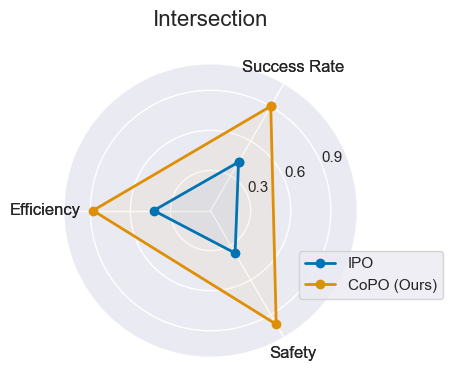

In [6]:
final_plot_data_to_plot = final_plot_data_from_eval_data + final_plot_data_from_raw_data
final_plot_data_to_plot = pd.DataFrame(final_plot_data_to_plot)

new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        val = gbb.value
        print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)


sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")
# c = [c[0], c[1], c[3], c[2]]
c = [c[0], c[1]]

env_mapping = {
    "bottle": "Bottleneck",
    "tollgate": "Tollgate",
    "inter": "Intersection",
    "round": "Roundabout",
    "parking": "Parking Lot"
}

algo_mapping = {
    "ippo": "IPO",
#     "ccppo": "MFPO",
    "copo": "CoPO (Ours)",
#     "cl": "CL"
}

# algo_order = ["ippo", "ccppo", "cl", "copo"]
algo_order = ["ippo", "copo"]

# env_order = ["round", "inter", "tollgate", "bottle", "parking"]
env_order = ["inter"]


# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=100, figsize=(22, 6))  
ax_0 = None
for env_count, env in enumerate(env_order):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 5, env_count + 1, polar=True)
    
    if env_count == 0:
        ax_0 = ax
    
    for algo_count, algo in enumerate(algo_order):
        algo_plot_data = env_plot_data[env_plot_data.algo == algo]
    
        labels = ["Competence", "Efficiency", "Safety"]
        plot_labels = ["Success Rate", "Efficiency", "Safety"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in labels]
        
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)+ np.pi/2 - np.pi / 6
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)
        
        print("Env {}, Algo {}, {}, {}".format(env, algo, angles, plot_labels))
        ax.set_thetagrids(angles[:3] * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=0)

        plt.gcf().canvas.draw()
        labels = []
        angles2 = [0, 0, 0]
        for label, angle in zip(ax.get_xticklabels(), angles2):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.8, 0.2))
fig.savefig("demo_result.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")


